In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import re
%run functions.py
import pickle

import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA

from sklearn.mixture import GMM
from sklearn import mixture
from sklearn.mixture import GaussianMixture

from nltk import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer, PorterStemmer

from gensim.matutils import Sparse2Corpus
from gensim import models

%matplotlib inline

import matplotlib.gridspec as gridspec

from subprocess import check_output

from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings("ignore")

In [ ]:

df=unpickle_('df_clean.pickle')
count_vectorizer=unpickle_('count_vectorizer.pickle')
count_sparse=unpickle_('count_sparse.pickle')
tfidf_vectorizer=unpickle_('tfidf_vectorizer.pickle')
tfidf_sparse=unpickle_('tfidf_sparse.pickle')


In [156]:
#Creates an Non-Matrix Factorization model
def nmf_model(sparse_matrix, n_components, alpha=0.1, l1_ratio=0.5):
    nmf = NMF(n_components=n_components, alpha=alpha, l1_ratio=l1_ratio, random_state=42).fit(sparse_matrix)
    nmf_topicsp = nmf.transform(sparse_matrix)
    return nmf, nmf_topicsp

In [219]:
#15 topics 
#played around with this and found 15 to be the best choice for my topic clusters
nmf_tfidf, nmf_topicsp_tfidf = nmf_model(tfidf_sparse, n_components=15)

In [162]:
nmf_topicsp_tfidf.shape

(7238, 15)

In [249]:
topic_model(tfidf_vectorizer, nmf_tfidf, num_words=30)

Topic 1
['matrix', 'rank', 'u', 'spars', 'tensor', 'norm', 'matric', 'algorithm', 'pca', 'subspac', 'entri', 'v', 'estim', 'column', 'recoveri', 'lasso', 'vector', 'data', 'low', 'eigenvalu', 'row', 'singular', 'method', 'dimension', 'theorem', 'sparsiti', 'spectral', 'error', 'project', 'decomposit']
Topic 2
['cell', 'respons', 'stimulu', 'visual', 'activ', 'signal', 'motion', 'neuron', 'cortex', 'filter', 'frequenc', 'orient', 'circuit', 'spatial', 'stimuli', 'field', 'eye', 'movement', 'recept', 'figur', 'input', 'cortic', 'time', 'brain', 'motor', 'auditori', 'veloc', 'control', 'fig', 'chip']
Topic 3
['polici', 'action', 'reward', 'state', 'agent', 'learn', 'mdp', 'reinforc', 'control', 'q', 'trajectori', 'plan', 'transit', 'pomdp', 'optim', 'environ', 'decis', 'game', 'time', 'robot', 'dynam', 'rl', 'st', 'v', 'algorithm', 'episod', 'discount', 'task', 'step', 'approxim']
Topic 4
['network', 'layer', 'train', 'unit', 'input', 'neural', 'output', 'hidden', 'weight', 'learn', 'arch

In [266]:
#pickle_(nmf_tfidf, 'nmf_tfidf')
#pickle_(nmf_topicsp_tfidf, 'nmf_topicsp_tfidf')
#pickle_(nmf_topicsp_tfidf, 'nmf_topicsp_tfidf_scaled')

In [28]:
'''
nmf_tfidf=unpickle_('nmf_tfidf.pickle')
nmf_topicsp_tfidf=unpickle_('nmf_topicsp_tfidf_scaled.pickle')
''';

In [265]:
nmf_topicsp_tfidf=scaled_matrix(nmf_topicsp_tfidf)
nmf_topicsp_tfidf

array([[-0.54846621,  0.47398725, -0.08426981, ..., -0.28650029,
         0.92316809, -0.34773719],
       [-0.02305614,  0.05596434, -0.34582731, ..., -0.28650029,
         0.8888957 , -0.61789783],
       [-0.54846621, -0.43931868, -0.34582731, ..., -0.00897257,
        -0.55637182, -0.12906842],
       ...,
       [ 1.07220381, -0.53654748, -0.34582731, ..., -0.28650029,
        -0.6539533 , -0.63302528],
       [ 0.21305636, -0.1506924 , -0.29080202, ..., -0.28650029,
        -0.63672114, -0.03621991],
       [ 1.22583757, -0.53654748, -0.02918315, ..., -0.28093492,
        -0.72398932,  1.72733269]])

In [167]:
df.reset_index(inplace=True)
drop_columns(df, 'index')

In [154]:
top_doc_per_topic(nmf_topicsp_tfidf, 10, df)


Topic 1
a new theory for matrix completion
low rank matrix and tensor completion via adaptive sampling
robust principal component analysis exact recovery of corrupted low rank matrices via convex optimization
non convex robust pca
deterministic symmetric positive semidefinite matrix completion
sparcs recovering low rank and sparse matrices from compressive measurements
on the power of truncated svd for general high rank matrix estimation problems
guaranteed rank minimization via singular value projection
dynamic matrix recovery from incomplete observations under an exact low rank constraint
matrix completion under monotonic single index models

Topic 2
stimulus encoding by multidimensional receptive fields in single cells and cell populations in v of awake monkey
a four neuron circuit accounts for change sensitive inhibition in salamander retina
eye movements and the maturation of cortical orientation selectivity
eye micro movements improve stimulus detection beyond the nyquist limit 

In [169]:
fifteen_topics = ['Matrix Completion',#1 
                'Computational Neuroscience',#2
                'Reinforcement Learning',#3 
                'Neural Networks',#4
                'Computer Vision',#5 
                'Clustering Algorithms',#6 
                'Bayesian Inference',#7 
                'Kernel Methods',#8
                'Statistical Classification',#9 
                'Tree-Based Methods',#10 
                'Multi-Armed Bandit Problems',#11
                'Topic Modeling',#12 
                'Spiking Neurons',#13
                'Approximation Algorithms',#14
                'Convex Optimization']#15

In [269]:
#manual check to see if topics remain consistent for each year.
#made mask for several years, only showing one.
df_2017 = df[df['year'] == 2017].reset_index(drop=True)
index_2017 = list(df[df['year'] == 2017].index)
nmf_topicsp_tfidf_2017 = nmf_topicsp_tfidf[index_2017]
top_doc_per_topic(nmf_topicsp_tfidf_2017, 5, df_2017)


Topic 1
a new theory for matrix completion, Score: 7.13600
on the power of truncated svd for general high rank matrix estimation problems, Score: 6.20526
speeding up latent variable gaussian graphical model estimation via nonconvex optimization, Score: 5.57892
fixed rank approximation of a positive semidefinite matrix from streaming data, Score: 5.31748
matrix norm estimation from a few entries, Score: 5.06092

Topic 2
robust estimation of neural signals in calcium imaging, Score: 2.70858
toward goal driven neural network models for the rodent whisker trigeminal system, Score: 2.55948
quantifying how much sensory information in a neural code is relevant for behavior, Score: 2.32683
adaptive stimulus selection for optimizing neural population responses, Score: 2.74511
training recurrent networks to generate hypotheses about how the brain solves hard navigation problems, Score: 2.26210

Topic 3
multi view decision processes the helper ai problem, Score: 6.04802
compatible reward inverse

In [272]:
tsne_tfidf_2d_model, tsne_tfidf_2d_matrix = tsne_model(nmf_topicsp_tfidf, num_dimensions=2, perplexity=800, n_iter=2000)

In [107]:
tsne_tfidf_2d_matrix.shape

(7238, 2)

In [273]:
tsne_tfidf_3d_model, tsne_tfidf_3d_matrix = tsne_model(nmf_topicsp_tfidf, num_dimensions=3, n_iter=2000)

In [105]:
tsne_tfidf_2d_model=unpickle_('tsne_tfidf_2d_model.pickle')
tsne_tfidf_2d_matrix=unpickle_('tsne_tfidf_2d_matrix.pickle')
tsne_tfidf_3d_model=unpickle_('tsne_tfidf_3d_model.pickle')
tsne_tfidf_3d_matrix=unpickle_('tsne_tfidf_3d_matrix.pickle')

In [283]:
df_2d_tsne=tsne_df_2D(tsne_tfidf_2d_matrix, nmf_topicsp_tfidf, df)

In [284]:
df_3d_tsne=tsne_df_3D(tsne_tfidf_3d_matrix, nmf_topicsp_tfidf, df)

In [100]:
'''
pickle_(df_2d_tsne, 'df_2d_tsne')
pickle_(df_3d_tsne, 'df_3d_tsne')
'''


df_2d_tsne=unpickle_('df_2d_tsne.pickle')
df_3d_tsne=unpickle_('df_3d_tsne.pickle')

In [103]:
df_2d_tsne.shape

(7238, 4)

In [44]:
#df_2d_tsne

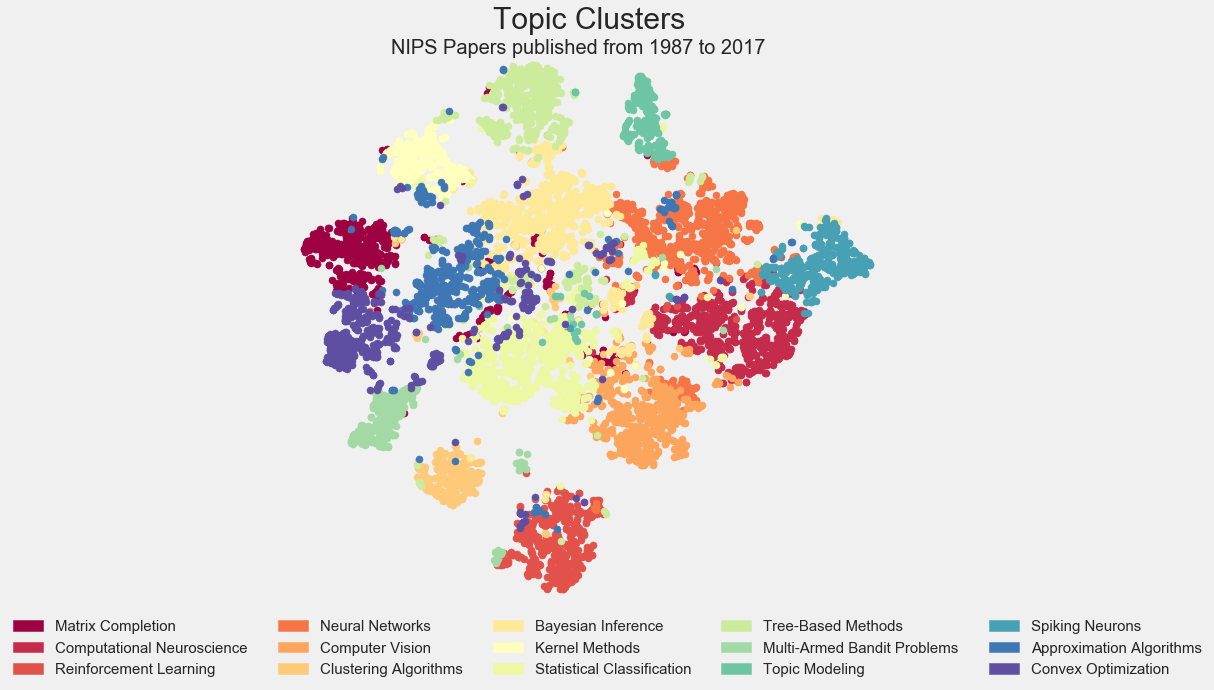

In [103]:
tsne_2d_plot(df_2d_tsne, 2017, fifteen_topics)

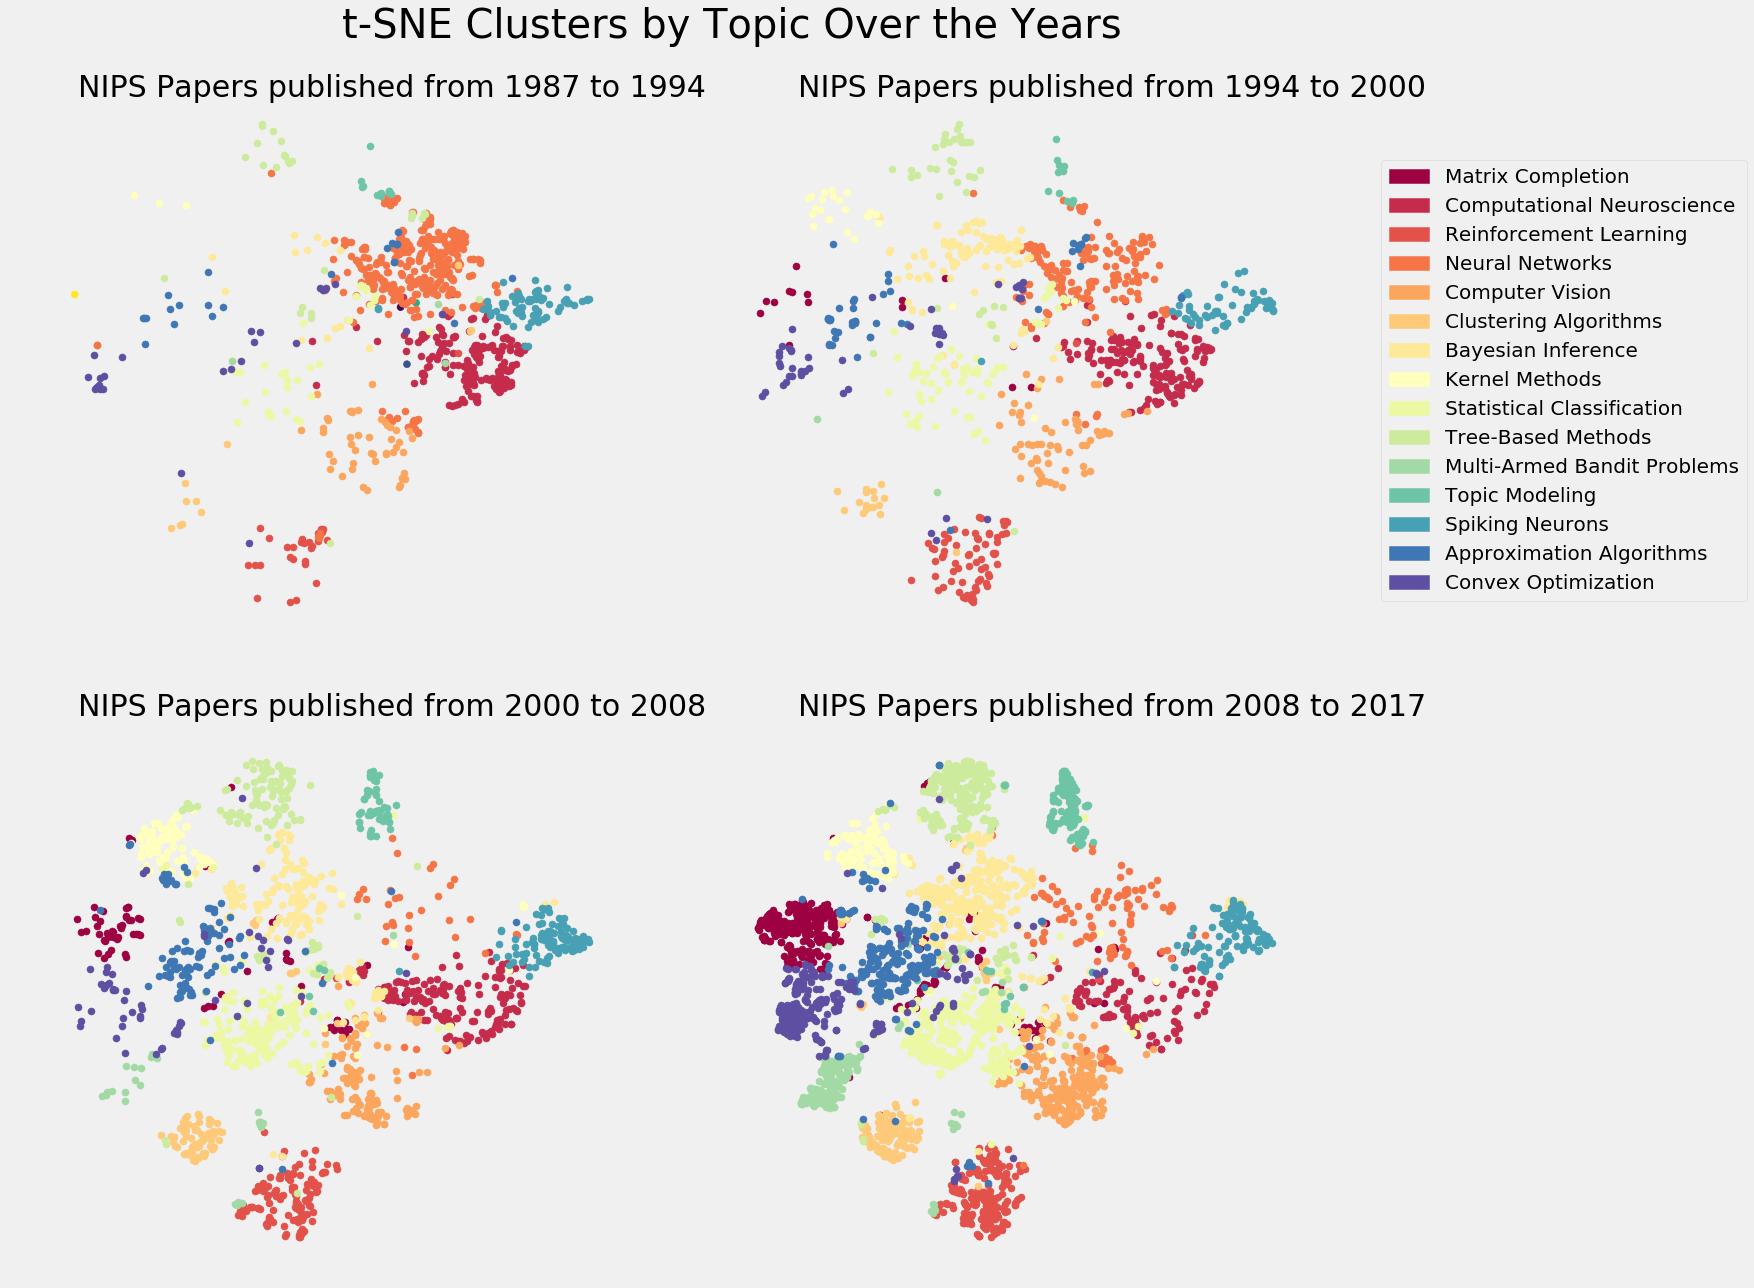

In [314]:
create_multiple_tsne_plot_2d(df_2d_tsne, 1994, 2000, 2008, 2017, fifteen_topics)

In [271]:
text = list(zip(tfidf_vectorizer.get_feature_names(), nmf_tfidf.components_[1]))
text

[('aaai', 0.0),
 ('ab', 0.004941679643065788),
 ('abil', 0.029556093048266046),
 ('abl', 0.030186522954517184),
 ('abov', 0.057164532401152095),
 ('absenc', 0.03946438198516911),
 ('absolut', 0.02402038542671366),
 ('ac', 0.012449863359760342),
 ('acceler', 0.009718185684464286),
 ('accept', 0.0),
 ('access', 0.014836023108479871),
 ('accord', 0.041632858204732594),
 ('account', 0.11301716592473107),
 ('accumul', 0.02020958905969584),
 ('accur', 0.027862737637914924),
 ('accuraci', 0.0052494942815823065),
 ('achiev', 0.02147192609205271),
 ('acknowledg', 0.029945453244720675),
 ('acm', 0.0),
 ('acoust', 0.07755074076885023),
 ('acquisit', 0.029171088245247487),
 ('act', 0.03450930281564557),
 ('action', 0.033772513834657535),
 ('activ', 0.6070071082320453),
 ('actor', 0.00025660158251444815),
 ('actual', 0.055971890439858264),
 ('ad', 0.026023476088232984),
 ('adaboost', 0.0),
 ('adam', 0.0),
 ('adapt', 0.17548728241441403),
 ('add', 0.0),
 ('addit', 0.06312310746969149),
 ('address', 

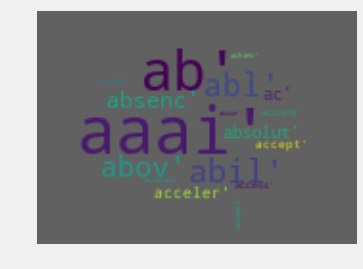

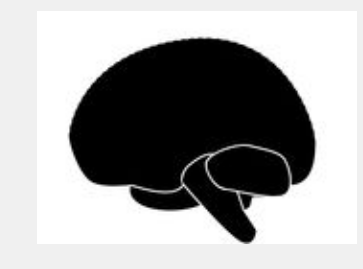

In [273]:
text = list(zip(tfidf_vectorizer.get_feature_names(), nmf_tfidf.components_[1]))
# Background color of wordcloud optimized for presentation background
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = path.dirname('/Users/aabid0193/Downloads/Screen Shot 2018-05-31 at 5.21.16 PM.png')

# Read the whole text.
text = text = list(zip(tfidf_vectorizer.get_feature_names(), nmf_tfidf.components_[1]))

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "Screen Shot 2018-05-31 at 5.21.16 PM.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="#616161", max_words=2000, mask=alice_mask,
               stopwords=stopwords)

# generate word cloud
wc.generate_from_text(str(text))

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
wc.to_file('question_mark_symptoms_white.png')
plt.axis("off")
plt.show()

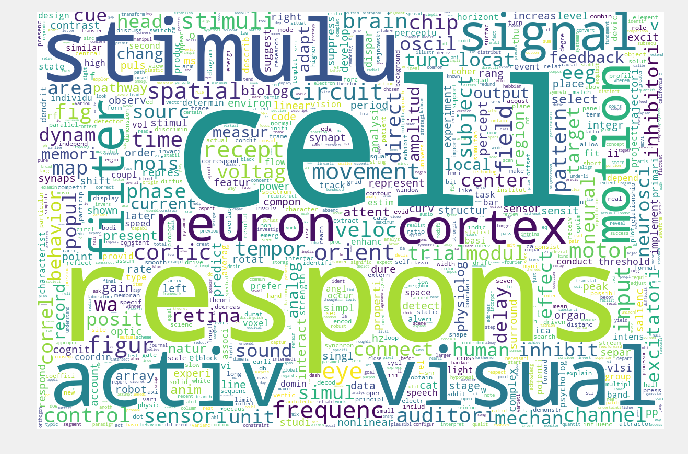

In [300]:

wc = WordCloud(background_color='white', max_words=1000, width=1200, height=800)

text = list(zip(tfidf_vectorizer.get_feature_names(), list(nmf_tfidf.components_[1])))

wc.generate_from_frequencies(dict(text))

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(wc)


(-0.5, 526.5, 471.5, -0.5)

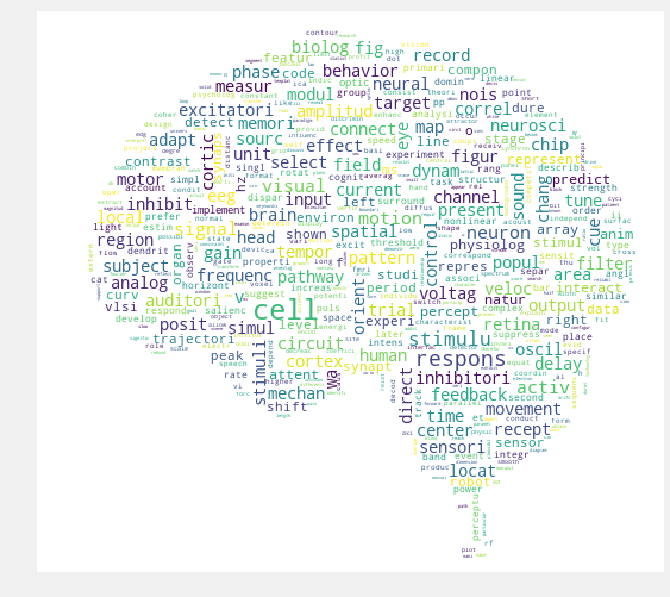

In [321]:
mask = np.array(Image.open('/Users/aabid0193/Downloads/Screen Shot 2018-05-31 at 5.35.25 PM.png'))
wc = WordCloud(max_words=25000, mask=mask, width=1500, height=1000, background_color='white', max_font_size=24)
text = list(zip(tfidf_vectorizer.get_feature_names(), list(nmf_tfidf.components_[1])))
wc.generate_from_frequencies(dict(text))

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')

In [299]:
wc

(-0.5, 372.5, 468.5, -0.5)

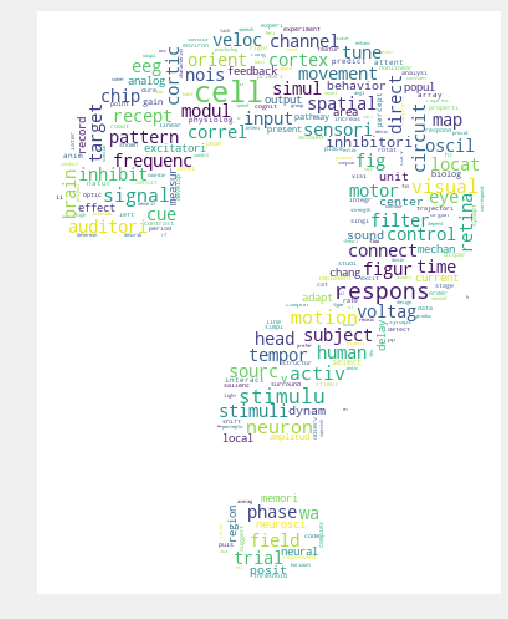

In [374]:
mask = np.array(Image.open('/Users/aabid0193/Downloads/Screen Shot 2018-05-31 at 11.06.28 PM.png'))
wc = WordCloud(max_words=25000, mask=mask, width=1500, height=1000, background_color='white', max_font_size=24)
text = list(zip(tfidf_vectorizer.get_feature_names(), list(nmf_tfidf.components_[1])))
wc.generate_from_frequencies(dict(text))

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')

In [117]:
'''
import matplotlib
matplotlib.rc('font',family='monospace')
import seaborn as sns
from huepy import *
plt.style.use('ggplot')


fig, axs = plt.subplots(3,2, figsize=(10, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=0)

axs = axs.ravel()

count = 0
legend = []
for year, idx in zip([1991,1996,2001,2006,2011,2017], range(6)):
    data = df_2d_tsne[df_2d_tsne['Year']<=year]
    scatter = axs[idx].scatter(data=data,x='x',y='y',s=6,cmap="Set1")
    axs[idx].set_title('published until {}'.format(year),**{'fontsize':'10'})
    axs[idx].axis('off')

plt.suptitle("all NIPS proceedings clustered by topic",**{'fontsize':'14','weight':'bold'})
plt.figtext(.51,0.95,'unsupervised topic modeling with NMF based on textual content + 2D-embedding with t-SNE:', **{'fontsize':'10','weight':'light'}, ha='center')


fig.legend(fifteen_topics,fifteen_topics,loc=(0.1,0.89),ncol=3)
plt.subplots_adjust(top=0.85)

plt.show()
''';

In [122]:
tsne_3d_plot(df_3d_tsne, 2017, fifteen_topics)

In [172]:
#tsne_tfidf_2d_model, tsne_tfidf_2d_matrix = tsne_model(nmf_topicsp_tfidf, num_dimensions=2, perplexity=1000, n_iter=2000)

In [173]:
#df_2d_tsne=tsne_df_2D(tsne_tfidf_2d_matrix, nmf_topicsp_tfidf, df)

In [174]:
'''
pickle_(df_2d_tsne, 'df_2d_tsne')
pickle_(df_3d_tsne, 'df_3d_tsne')



df_2d_tsne=unpickle_('df_2d_tsne.pickle')
df_3d_tsne=unpickle_('df_3d_tsne.pickle')'''

"\npickle_(df_2d_tsne, 'df_2d_tsne')\npickle_(df_3d_tsne, 'df_3d_tsne')\n\n\n\ndf_2d_tsne=unpickle_('df_2d_tsne.pickle')\ndf_3d_tsne=unpickle_('df_3d_tsne.pickle')"

In [103]:
df_2d_tsne.shape

(7238, 4)

In [175]:
#tsne_2d_plot(df_2d_tsne, 2017, fifteen_topics)

## For Future reference & recommendation Engine

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
df_cosine_sim=pd.DataFrame(nmf_topicsp_tfidf, columns=fifteen_topics)

In [96]:
#pickle_(df_cosine_sim, 'df_cosine_sim')
#df_cosine_sim=unpickle_('df_cosine_sim.pickle')

In [60]:
df_cosine_sim.head(3)

,Matrix Completion,Computational Neuroscience,Reinforcement Learning,Neural Networks,Computer Vision,Clustering Algorithms,Bayesian Inference,Kernel Methods,Statistical Classification,Tree-Based Methods,Multi-Armed Bandit Problems,Topic Modeling,Spiking Neurons,Approximation Algorithms,Convex Optimization
0,-0.548466,0.473987,-0.084270,0.054961,1.424388,-0.276182,-0.176910,-0.321453,0.370466,0.245789,-0.280634,-0.018992,-0.286500,0.923168,-0.347737
1,-0.023056,0.055964,-0.345827,0.420905,-0.468785,-0.276182,-0.804848,-0.321453,-0.683763,-0.442260,-0.123951,-0.128112,-0.286500,0.888896,-0.617898
2,-0.548466,-0.439319,-0.345827,3.305841,-0.468785,-0.276182,-0.239064,-0.321453,-0.170111,1.724851,-0.163450,-0.228463,-0.008973,-0.556372,-0.129068


In [69]:
df_cosine_sim.shape

(7238, 15)

In [67]:
dists = cosine_similarity(df_cosine_sim)

In [68]:
dists

array([[ 1.        ,  0.14633467, -0.0248196 , ..., -0.21674978,
        -0.17334818, -0.51935051],
       [ 0.14633467,  1.        ,  0.15177274, ..., -0.02916873,
        -0.27968001, -0.37550383],
       [-0.0248196 ,  0.15177274,  1.        , ...,  0.53087355,
         0.05305654, -0.15156834],
       ...,
       [-0.21674978, -0.02916873,  0.53087355, ...,  1.        ,
         0.67195078, -0.11275645],
       [-0.17334818, -0.27968001,  0.05305654, ...,  0.67195078,
         1.        , -0.1826311 ],
       [-0.51935051, -0.37550383, -0.15156834, ..., -0.11275645,
        -0.1826311 ,  1.        ]])

In [83]:
dists = pd.DataFrame(dists, columns=df_cosine_sim.index)

dists.index = dists.columns
dists.iloc[0:5, 0:5]

,0,1,2,3,4
0,1.000000,0.146335,-0.024820,-0.422679,0.120047
1,0.146335,1.000000,0.151773,-0.047288,0.228512
2,-0.024820,0.151773,1.000000,-0.001792,0.262487
3,-0.422679,-0.047288,-0.001792,1.000000,0.079363
4,0.120047,0.228512,0.262487,0.079363,1.000000


In [94]:
dists

,0,1,2,3,4,5,6,7,8,9,...,7228,7229,7230,7231,7232,7233,7234,7235,7236,7237
0,1.000000,0.146335,-0.024820,-0.422679,0.120047,-0.269085,0.566833,0.153707,-0.036116,0.134023,...,-0.451300,0.039611,0.068321,0.253495,-0.044227,-0.136467,-0.420256,-0.216750,-0.173348,-0.519351
1,0.146335,1.000000,0.151773,-0.047288,0.228512,0.256243,0.059251,0.218512,0.560541,0.240067,...,-0.076860,-0.296772,-0.173604,-0.064933,0.066757,-0.055713,0.234851,-0.029169,-0.279680,-0.375504
2,-0.024820,0.151773,1.000000,-0.001792,0.262487,0.304884,0.038145,-0.167158,0.687955,0.046362,...,-0.189626,-0.115513,0.375084,0.292661,-0.162144,-0.375972,-0.215585,0.530874,0.053057,-0.151568
3,-0.422679,-0.047288,-0.001792,1.000000,0.079363,0.114852,-0.049124,0.051677,0.127207,0.082435,...,0.786498,-0.214113,-0.224714,-0.265099,0.722748,-0.042158,0.277822,-0.108229,-0.123553,0.620770
4,0.120047,0.228512,0.262487,0.079363,1.000000,0.151719,0.378836,0.857681,0.185827,0.955750,...,-0.140935,-0.184368,-0.101611,-0.003193,-0.255613,-0.431878,-0.186021,0.102980,-0.081650,-0.232519
5,-0.269085,0.256243,0.304884,0.114852,0.151719,1.000000,0.271581,0.166299,0.512431,0.206733,...,0.000007,-0.210564,-0.045471,0.014483,-0.214491,-0.336668,0.056261,0.117557,-0.132339,-0.189217
6,0.566833,0.059251,0.038145,-0.049124,0.378836,0.271581,1.000000,0.359710,0.073042,0.401541,...,-0.202112,-0.229144,-0.195540,0.217972,-0.237908,-0.556232,-0.222820,-0.106265,-0.235577,-0.340537
7,0.153707,0.218512,-0.167158,0.051677,0.857681,0.166299,0.359710,1.000000,-0.148198,0.966354,...,-0.164725,-0.116484,-0.131092,-0.160143,-0.151488,-0.333864,-0.164070,-0.196206,-0.085629,-0.293427
8,-0.036116,0.560541,0.687955,0.127207,0.185827,0.512431,0.073042,-0.148198,1.000000,0.039748,...,0.049187,-0.280473,-0.191638,0.134809,0.031877,-0.142529,0.091533,0.321470,-0.268937,-0.106015
9,0.134023,0.240067,0.046362,0.082435,0.955750,0.206733,0.401541,0.966354,0.039748,1.000000,...,-0.169329,-0.175297,-0.148585,-0.100620,-0.192181,-0.415822,-0.185740,-0.069271,-0.112894,-0.277151


In [85]:
dists_summed = np.sum(dists, axis=1)

In [88]:
dists_summed.head()

0     38.461403
1    108.985657
2     72.566754
3     38.881047
4     99.701237
dtype: float64

In [90]:
dists_summed=dists_summed.sort_values(ascending=False)

In [91]:
ranked_dists = dists_summed.index
ranked_dists = ranked_dists.tolist()
ranked_dists[:5]

[1723, 929, 742, 1238, 2675]

In [93]:
for paper in get_similar(["Matrix Completion"], 10):
    print(paper)

0
1
2
3
4
5
6
7
8
9
